In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy
from desert import isnum
from pfunctions import getTimeSteps
from FGMTableV2 import *
from readOFFiles import *
from scipy.interpolate import interp1d
from tableProperties import FGMtableProperties
from lookup import lookup
from oneDCaseReader import oneDCaseReader

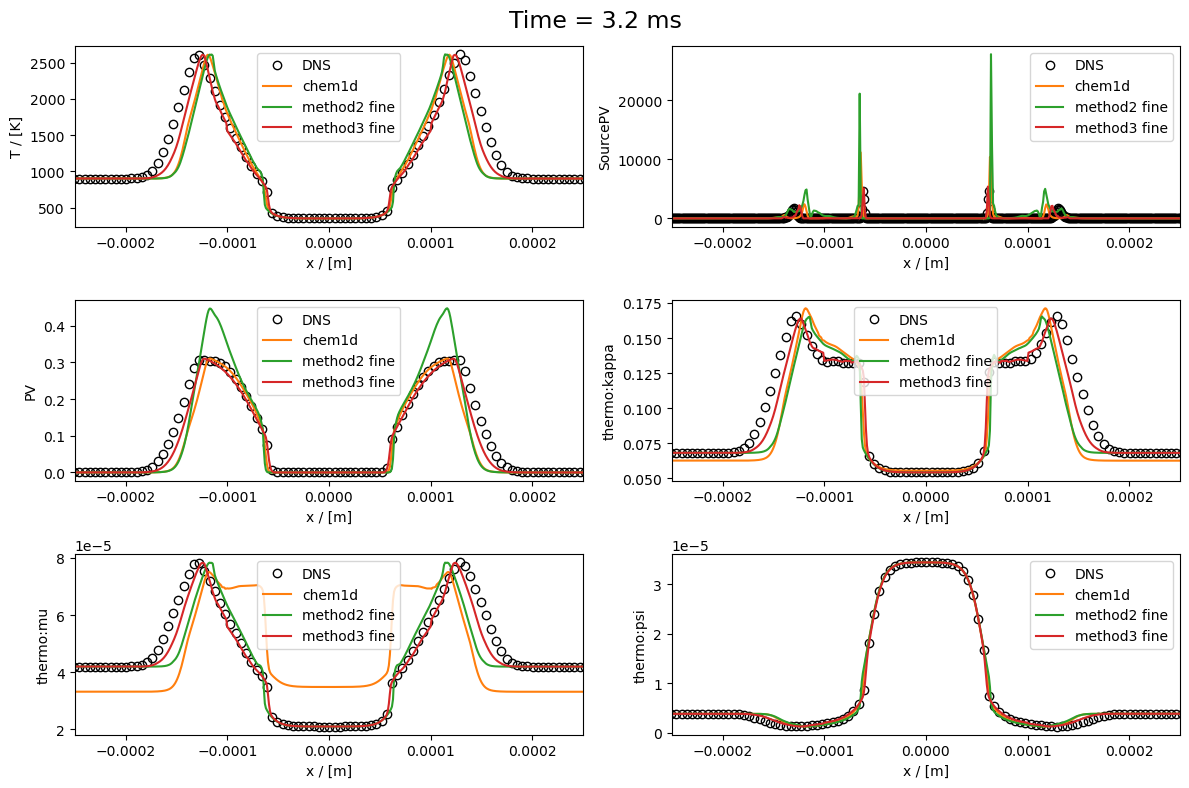

In [8]:
DNSCase = oneDCaseReader("../Cases/nhep1d/dnsStandard/")
c1dCase = oneDCaseReader("../Cases/nhep1d/c1d/")
m2fCase = oneDCaseReader("../Cases/nhep1d/m2f/")
m3fCase = oneDCaseReader("../Cases/nhep1d/m3fnew/")

t = 0.0032
plt.figure(figsize=(12,8))

plt.subplot(321)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "T"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel("T / [K]")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.subplot(322)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "SourcePV"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000, field_DNS, 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel("SourcePV")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.subplot(323)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "PV"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel("PV")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.subplot(324)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "thermo:kappa"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel("thermo:kappa")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.subplot(325)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "thermo:mu"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel("thermo:mu")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.subplot(326)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "thermo:psi"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel("thermo:psi")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.suptitle("Time = {} ms".format(t*1000),fontsize = 17)
plt.tight_layout()
plt.savefig("timeonline" + str(t*1000) + ".png",dpi = 125)

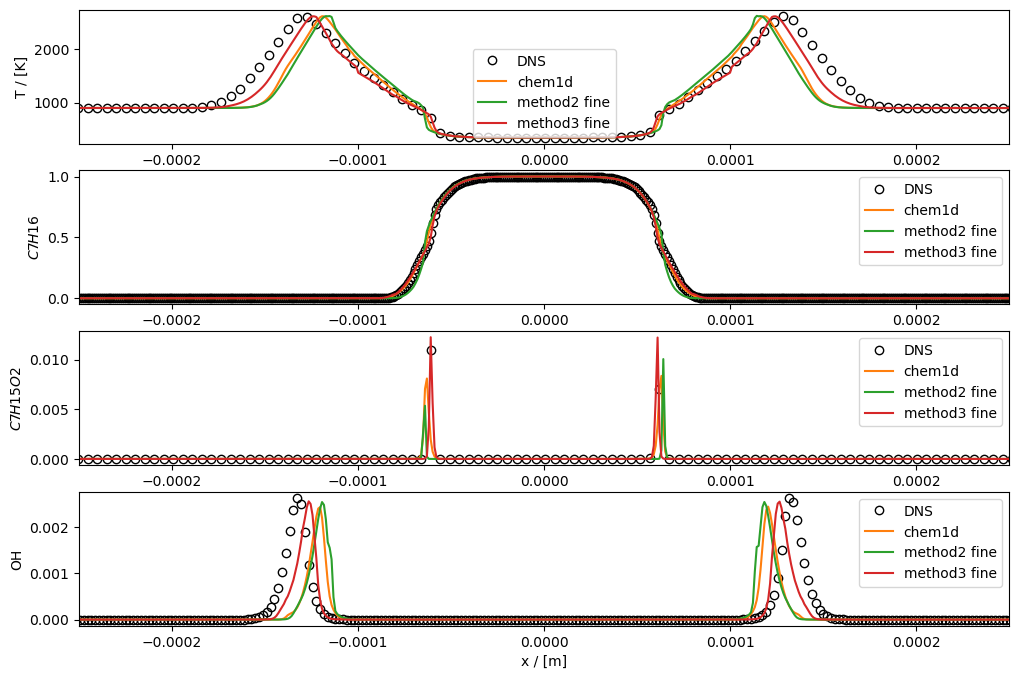

In [7]:
DNSCase = oneDCaseReader("../Cases/nhep1d/dnsStandard/")
c1dCase = oneDCaseReader("../Cases/nhep1d/c1d/")
m2fCase = oneDCaseReader("../Cases/nhep1d/m2f/")
m3fCase = oneDCaseReader("../Cases/nhep1d/m3fnew/")

t = 0.0032
plt.figure(figsize=(12,8))

plt.subplot(411)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "T"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel("T / [K]")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.subplot(412)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "C7H16"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000, field_DNS, 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel(r"$C7H16$")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.subplot(413)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "C7H15O2"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::5], field_DNS[::5], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel(r"$C7H15O2$")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.subplot(414)
x_1000 = np.linspace(-0.000512,0.000512,1000)
field = "OH"
field_DNS = DNSCase.readData(t,field)
field_c1d = c1dCase.readData(t,field)
field_m2f = m2fCase.readData(t,field)
field_m3f = m3fCase.readData(t,field)

plt.plot(x_1000[::2], field_DNS[::2], 'o', markerfacecolor = 'none', markeredgecolor = 'black', label = "DNS")
plt.plot(x_1000, field_c1d, label = "chem1d")
plt.plot(x_1000, field_m2f, label = "method2 fine")
plt.plot(x_1000, field_m3f, label = "method3 fine")
plt.xlabel("x / [m]")
plt.ylabel(r"OH")
plt.xlim([-0.00025, 0.00025])
plt.legend()

plt.savefig("latest1.png")